In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../Data/Copy of Week2_challenge_data_source(CSV).csv'  # Update this with your dataset path
data = pd.read_csv(file_path)

# Inspect the dataset
print(data.head())
print(data.info())


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [2]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_1256/2376396972.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette="viridis")


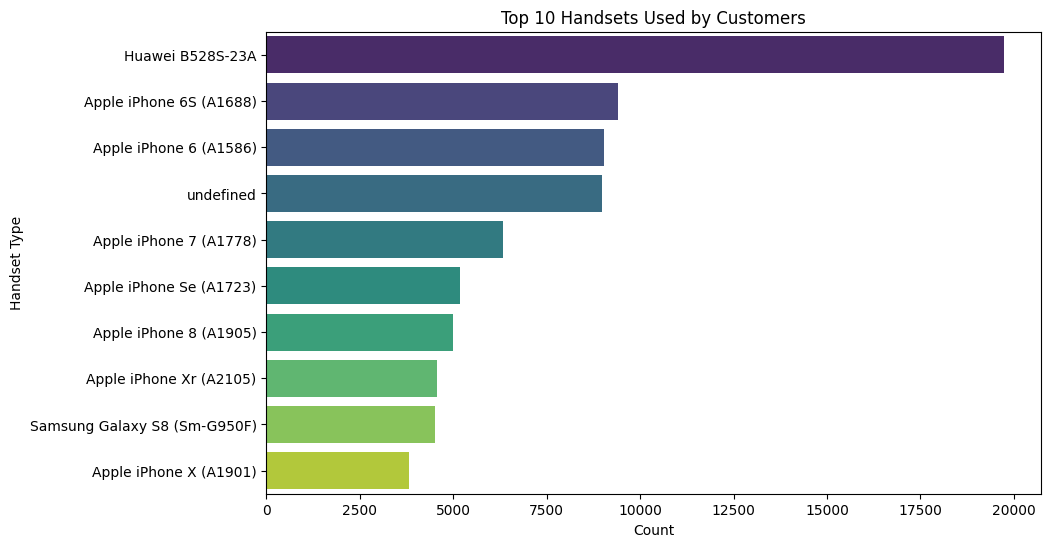

In [3]:
# Top 10 handsets
top_10_handsets = data['Handset Type'].value_counts().head(10)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette="viridis")
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Count')
plt.ylabel('Handset Type')
plt.show()


/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_1256/2402987955.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_manufacturers.values, y=top_3_manufacturers.index, palette="mako")


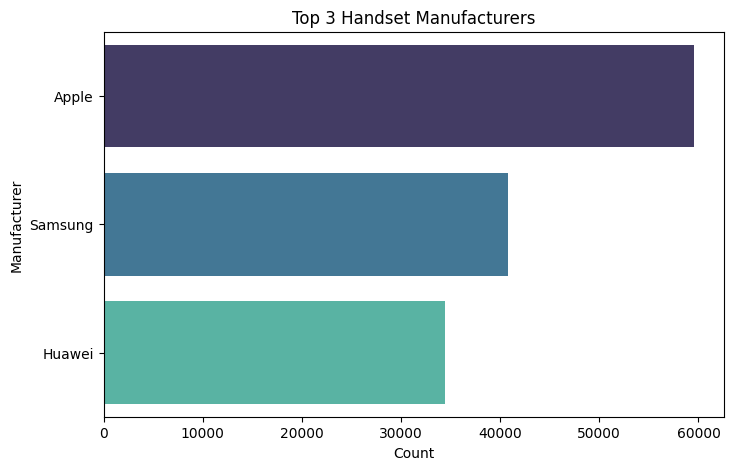

In [4]:
# Top 3 manufacturers
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=top_3_manufacturers.values, y=top_3_manufacturers.index, palette="mako")
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()


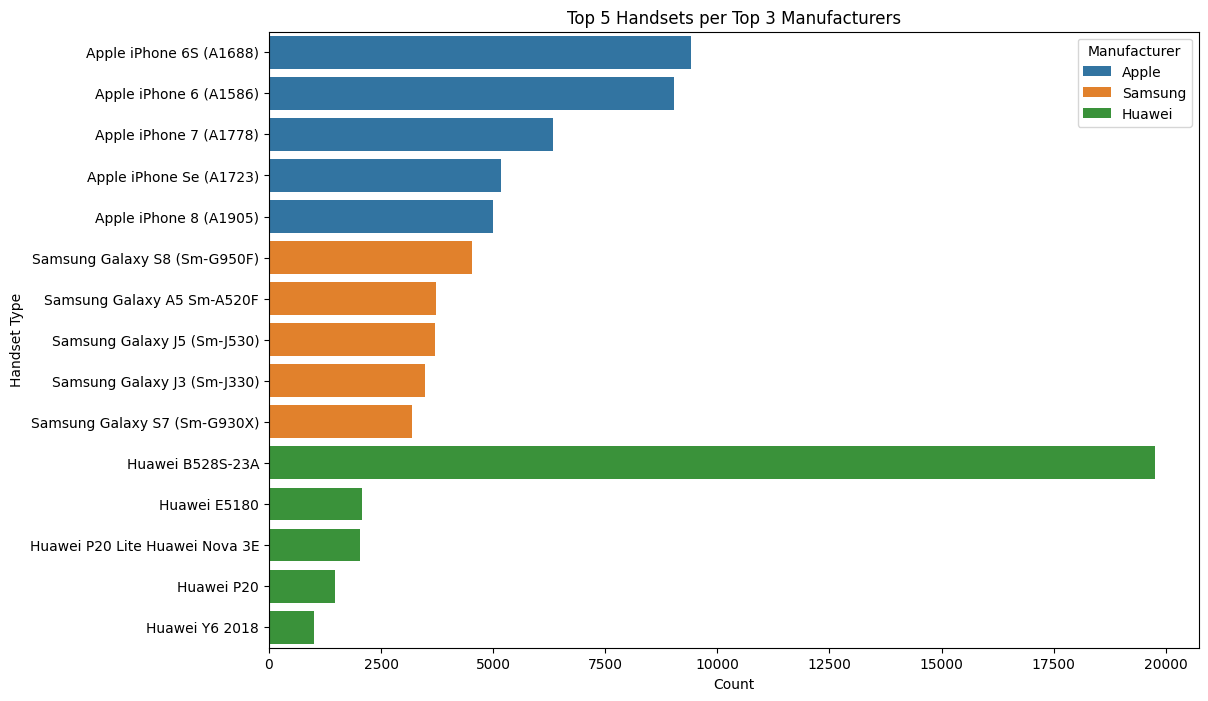

In [5]:
# Top 3 manufacturers
top_3 = top_3_manufacturers.index

# Top 5 handsets per manufacturer
top_5_per_manufacturer = {}
for manufacturer in top_3:
    top_5_per_manufacturer[manufacturer] = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

# Visualization
plt.figure(figsize=(12, 8))
for manufacturer, handsets in top_5_per_manufacturer.items():
    sns.barplot(x=handsets.values, y=handsets.index, label=manufacturer)

plt.title('Top 5 Handsets per Top 3 Manufacturers')
plt.xlabel('Count')
plt.ylabel('Handset Type')
plt.legend(title="Manufacturer")
plt.show()


In [6]:
# Aggregate per user
user_behavior = data.groupby('IMSI').agg({
    'Bearer Id': 'count',                 # Number of xDR sessions
    'Dur. (ms)': 'sum',                   # Total session duration
    'Total DL (Bytes)': 'sum',            # Total Download
    'Total UL (Bytes)': 'sum',            # Total Upload
    'Social Media DL (Bytes)': 'sum',     # Social Media Download
    'Social Media UL (Bytes)': 'sum',     # Social Media Upload
    'Youtube DL (Bytes)': 'sum',          # YouTube Download
    'Youtube UL (Bytes)': 'sum',          # YouTube Upload
    'Netflix DL (Bytes)': 'sum',          # Netflix Download
    'Netflix UL (Bytes)': 'sum',          # Netflix Upload
    'Google DL (Bytes)': 'sum',           # Google Download
    'Google UL (Bytes)': 'sum',           # Google Upload
    'Email DL (Bytes)': 'sum',            # Email Download
    'Email UL (Bytes)': 'sum',            # Email Upload
    'Gaming DL (Bytes)': 'sum',           # Gaming Download
    'Gaming UL (Bytes)': 'sum',           # Gaming Upload
    'Other DL (Bytes)': 'sum',            # Other Download
    'Other UL (Bytes)': 'sum'             # Other Upload
}).reset_index()

# Add total data volume
user_behavior['Total Data Volume (Bytes)'] = user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)']
print(user_behavior.head())


           IMSI  Bearer Id  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
0  2.040471e+14          1   869844.0        78697597.0        60456049.0   
1  2.040808e+14          1   877385.0       194828056.0        37295915.0   
2  2.082001e+14          1    86019.0        31376981.0        53794658.0   
3  2.082001e+14          1    86254.0       392918313.0        33583272.0   
4  2.082001e+14          2   573923.0       961767023.0        71325004.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Youtube DL (Bytes)  \
0                1500145.0                  45943.0          18980320.0   
1                 668596.0                  46628.0           9839889.0   
2                3073697.0                  49084.0           5556563.0   
3                2542767.0                  34337.0          22414714.0   
4                3326811.0                  99905.0           4046597.0   

   Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
0          21960390.0

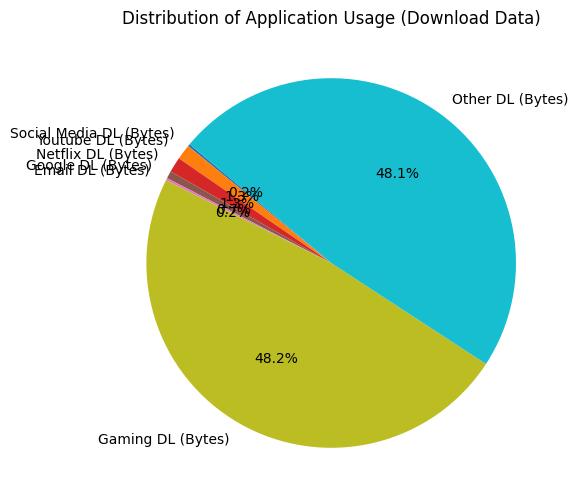

In [7]:
# Summarize application usage
app_usage = user_behavior[['Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 
                           'Google DL (Bytes)', 'Email DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].sum()

# Visualization
plt.figure(figsize=(10, 6))
app_usage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab10')
plt.title('Distribution of Application Usage (Download Data)')
plt.ylabel('')
plt.show()


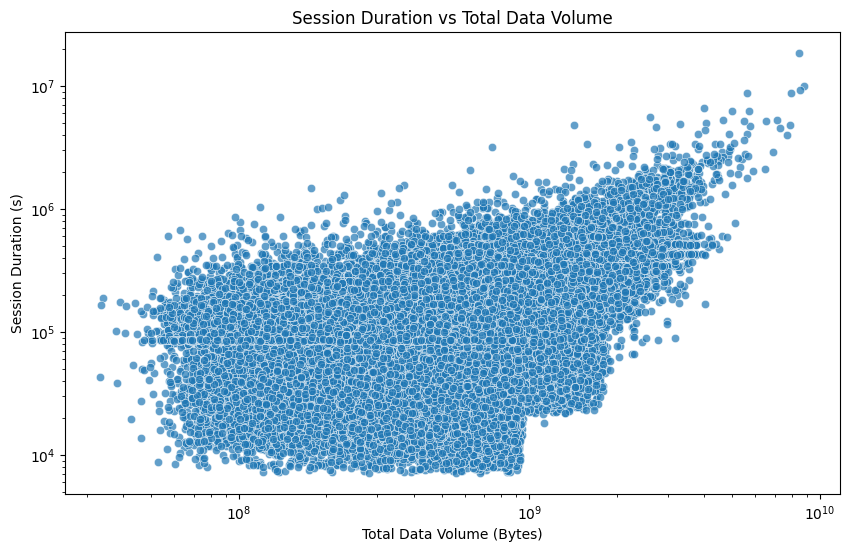

In [8]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_behavior, x='Total Data Volume (Bytes)', y='Dur. (ms)', alpha=0.7)
plt.title('Session Duration vs Total Data Volume')
plt.xlabel('Total Data Volume (Bytes)')
plt.ylabel('Session Duration (s)')
plt.xscale('log')
plt.yscale('log')
plt.show()



In [9]:
# Data overview
print(data.info())
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Treat missing values for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Verify no missing values remain
print("Remaining Missing Values:\n", data.isnull().sum())






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [10]:
# Function to replace outliers with the column mean
def replace_outliers_with_mean(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.apply(lambda x: column.mean() if x < lower_bound or x > upper_bound else x)

# Replace outliers for all numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].apply(replace_outliers_with_mean)

# Verify that no extreme outliers remain
print(data[numeric_columns].describe())


          Bearer Id       Start ms         End ms      Dur. (ms)  \
count  1.500010e+05  150001.000000  150001.000000  150001.000000   
mean   1.013887e+19     499.188200     498.800880   92852.574377   
std    2.883600e+18     288.610872     288.096693   49348.957306   
min    6.917538e+18       0.000000       0.000000    7142.000000   
25%    7.349883e+18     250.000000     251.000000   57442.000000   
50%    7.349883e+18     499.000000     500.000000   86399.000000   
75%    1.304243e+19     749.000000     750.000000  116737.000000   
max    1.318654e+19     999.000000     999.000000  244900.000000   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.500010e+05   1.500010e+05  1.500010e+05    150001.000000   
mean   2.082016e+14   3.501433e+10  4.847455e+13        67.089326   
std    3.310759e+08   3.052711e+09  2.237359e+13        39.123157   
min    2.082009e+14   3.360171e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3.365182e+10  3.5462

In [11]:
# Calculate total duration per user
data['Total Duration (s)'] = data['Dur. (ms)'] / 1000  # Convert ms to seconds

# Segment into decile classes, dropping duplicate edges
data['Decile Class'] = pd.qcut(data['Total Duration (s)'], 10, labels=range(1, 11), duplicates="drop")

# Compute total data (DL + UL) per decile
decile_summary = data.groupby('Decile Class').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
})
decile_summary['Total Data (Bytes)'] = decile_summary['Total DL (Bytes)'] + decile_summary['Total UL (Bytes)']

print(decile_summary)

# Ensure all necessary columns are present and numeric
numeric_columns = ['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate total duration per user
data['Total Duration (s)'] = data['Dur. (ms)'] / 1000  # Convert ms to seconds

# Segment into decile classes, dropping duplicate edges
data['Decile Class'] = pd.qcut(data['Total Duration (s)'], 10, labels=range(1, 11), duplicates="drop")

# Compute total data (DL + UL) per decile
decile_summary = data.groupby('Decile Class').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
})
decile_summary['Total Data (Bytes)'] = decile_summary['Total DL (Bytes)'] + decile_summary['Total UL (Bytes)']

print(decile_summary)



ValueError: Bin labels must be one fewer than the number of bin edges

In [ ]:
# Basic metrics for quantitative variables
metrics = data[numeric_columns].agg(['mean', 'median', 'std', 'min', 'max']).T
print(metrics)


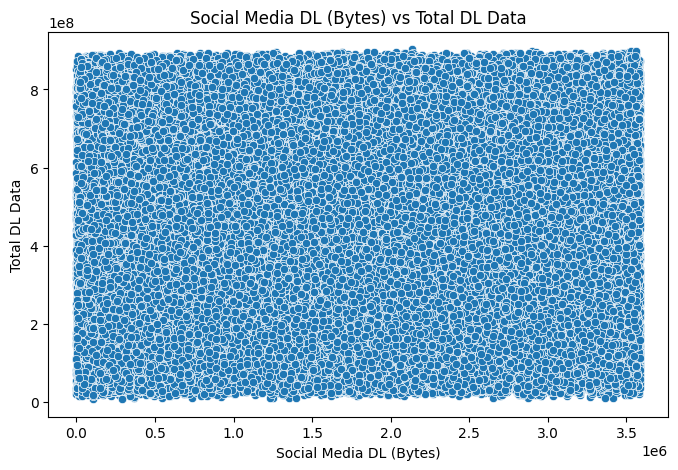

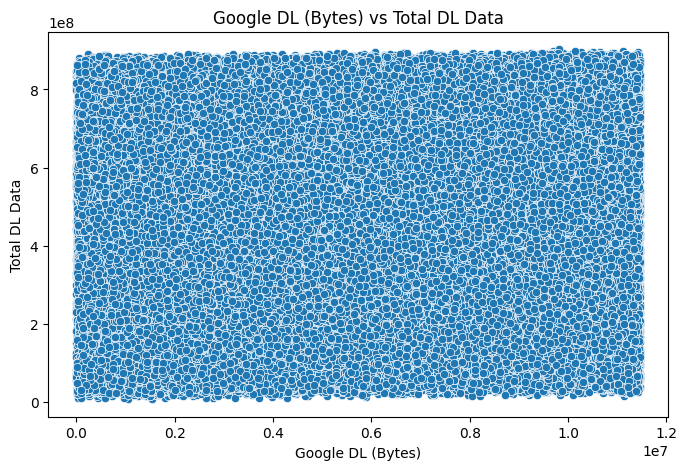

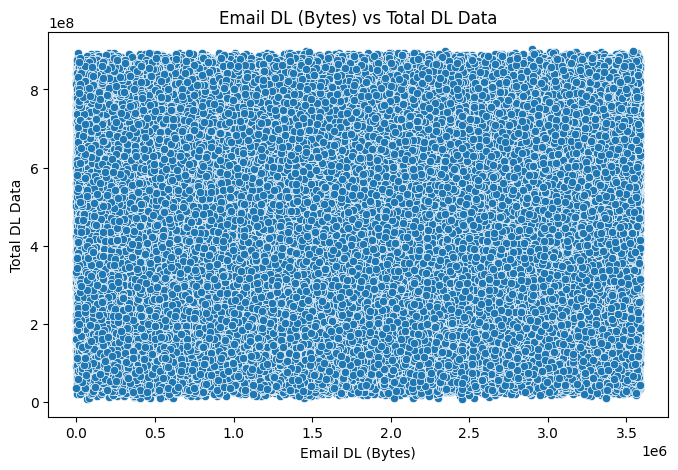

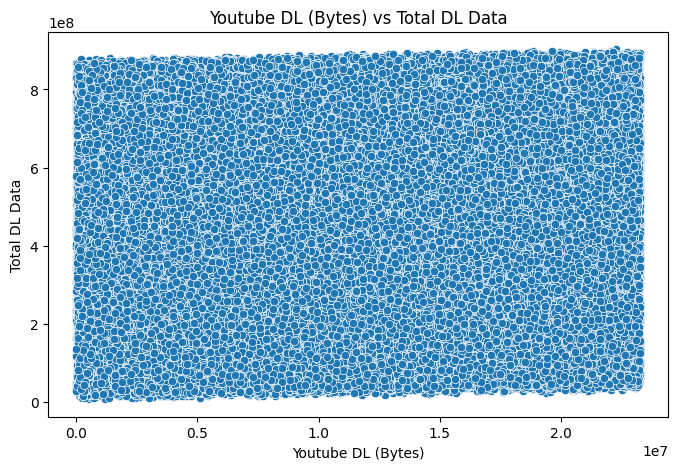

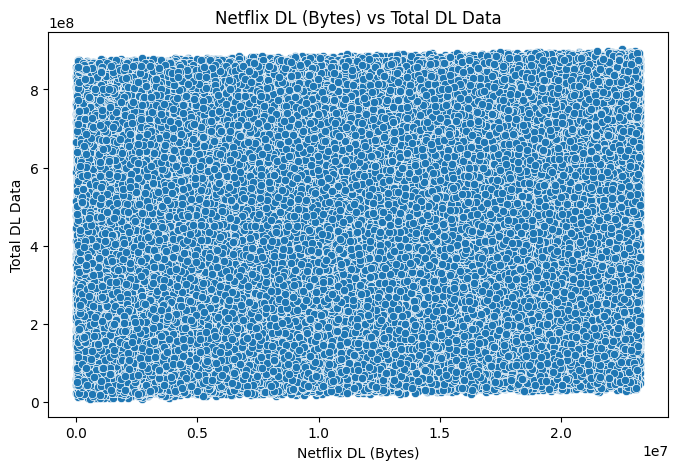

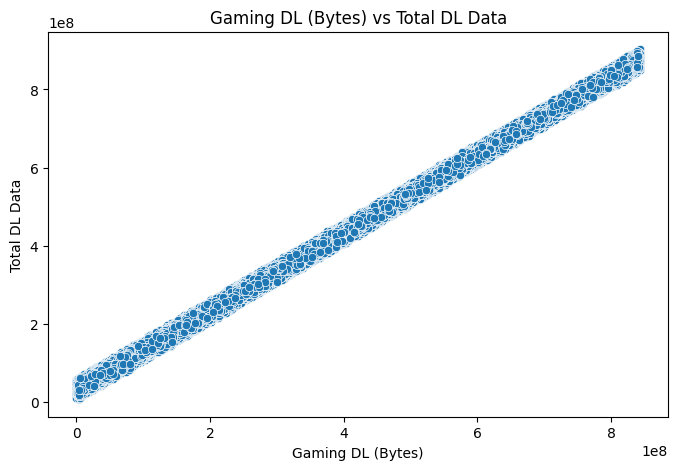

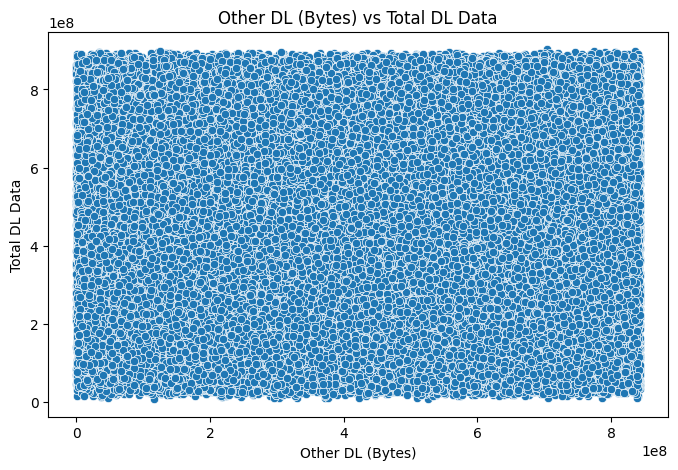

In [12]:
# Relationship between applications and total data
apps = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
        'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

for app in apps:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=app, y='Total DL (Bytes)')
    plt.title(f'{app} vs Total DL Data')
    plt.xlabel(app)
    plt.ylabel('Total DL Data')
    plt.show()



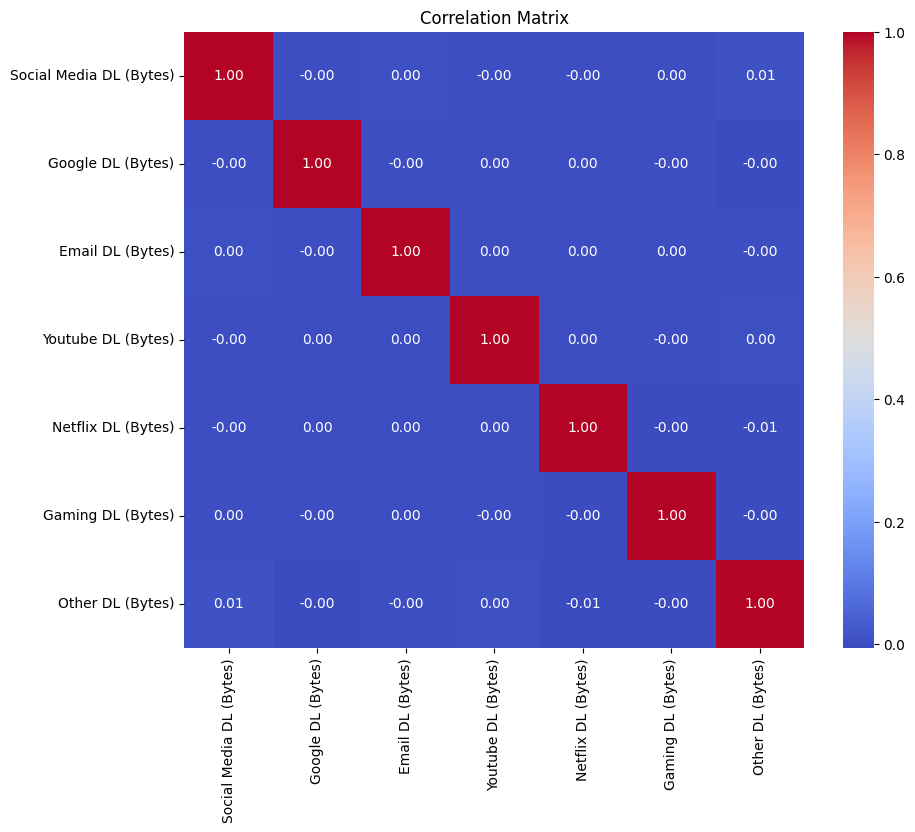

In [13]:
# Correlation matrix
selected_apps = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
correlation_matrix = data[selected_apps].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[selected_apps])

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)


Explained Variance Ratios: [0.14439453 0.14355429 0.14328287]


In [17]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [19]:
# Aggregate engagement metrics per customer
engagement_metrics = data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',                # Session frequency
    'Dur. (ms)': 'sum',                  # Total session duration
    'Total DL (Bytes)': 'sum',           # Total download
    'Total UL (Bytes)': 'sum'            # Total upload
}).rename(columns={
    'Bearer Id': 'Session Frequency',
    'Dur. (ms)': 'Total Duration (ms)',
    'Total DL (Bytes)': 'Total Download (Bytes)',
    'Total UL (Bytes)': 'Total Upload (Bytes)'
})

# Add Total Traffic column
engagement_metrics['Total Traffic (Bytes)'] = (
    engagement_metrics['Total Download (Bytes)'] + engagement_metrics['Total Upload (Bytes)']
)

# Report top 10 customers per engagement metric
top_10_frequency = engagement_metrics.sort_values('Session Frequency', ascending=False).head(10)
top_10_duration = engagement_metrics.sort_values('Total Duration (ms)', ascending=False).head(10)
top_10_traffic = engagement_metrics.sort_values('Total Traffic (Bytes)', ascending=False).head(10)

print("Top 10 customers by session frequency:\n", top_10_frequency)
print("Top 10 customers by total duration:\n", top_10_duration)
print("Top 10 customers by total traffic:\n", top_10_traffic)


Top 10 customers by session frequency:
                Session Frequency  Total Duration (ms)  Total Download (Bytes)  \
MSISDN/Number                                                                   
4.188282e+10               24742         2.296964e+09            1.118994e+13   
3.362632e+10                  18         2.040353e+06            7.301517e+09   
3.361489e+10                  17         1.933331e+06            8.156743e+09   
3.362578e+10                  17         1.890405e+06            7.770043e+09   
3.365973e+10                  16         2.087574e+06            7.081602e+09   
3.367588e+10                  15         1.927227e+06            7.309542e+09   
3.366716e+10                  13         1.428218e+06            5.052068e+09   
3.360313e+10                  12         1.310041e+06            4.540607e+09   
3.360452e+10                  12         1.375129e+06            5.096079e+09   
3.362708e+10                  12         1.377436e+06            5.30

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalize metrics
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(
    engagement_metrics[['Session Frequency', 'Total Duration (ms)', 'Total Traffic (Bytes)']]
)

# Run K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)

# Compute cluster statistics
cluster_stats = engagement_metrics.groupby('Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})
print(cluster_stats)


        Session Frequency                             Total Duration (ms)  \
                      min    max          mean    sum                 min   
Cluster                                                                     
0                       1     18      2.651419  43645        3.195800e+04   
1                   24742  24742  24742.000000  24742        2.296964e+09   
2                       1      3      1.109263  81614        7.146000e+03   

                                                  Total Traffic (Bytes)  \
                  max          mean           sum                   min   
Cluster                                                                   
0        2.087574e+06  2.796721e+05  4.603683e+09          1.813988e+08   
1        2.296964e+09  2.296964e+09  2.296964e+09          1.220769e+13   
2        2.745516e+05  9.551251e+04  7.027333e+09          3.324901e+07   

                                                   
                  max          mea

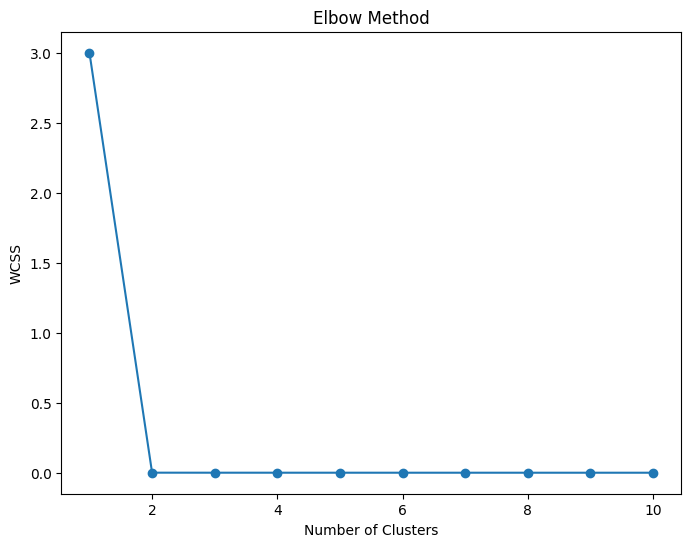

In [21]:
# Compute within-cluster sum of squares (WCSS) for different k values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [26]:
# Define application categories
applications = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']

# Compute total traffic for each application and add to the dataset
for app in applications:
    data[f'{app} Traffic (Bytes)'] = (
        data[f'{app} DL (Bytes)'] + data[f'{app} UL (Bytes)']
    )

# Aggregate total traffic per customer for each application
app_traffic = data.groupby('MSISDN/Number')[
    [f'{app} Traffic (Bytes)' for app in applications]
].sum()

# Identify top 10 users for each application
top_users_per_app = {
    app: app_traffic.sort_values(f'{app} Traffic (Bytes)', ascending=False).head(10)
    for app in applications
}

# Display top 10 users for each application
for app, users in top_users_per_app.items():
    print(f"\nTop 10 most engaged users for {app} Traffic (Bytes):\n")
    print(users)



Top 10 most engaged users for Social Media Traffic (Bytes):

               Social Media Traffic (Bytes)  Youtube Traffic (Bytes)  \
MSISDN/Number                                                          
4.188282e+10                   4.534843e+10             5.620232e+11   
3.362632e+10                   4.337478e+07             3.744830e+08   
3.365973e+10                   3.541236e+07             2.579911e+08   
3.361489e+10                   2.829454e+07             3.943702e+08   
3.362578e+10                   2.713550e+07             4.529588e+08   
3.366716e+10                   2.424785e+07             3.152313e+08   
3.366907e+10                   2.380083e+07             2.364028e+08   
3.360313e+10                   2.307782e+07             2.840901e+08   
3.365849e+10                   2.300007e+07             1.832642e+08   
3.366553e+10                   2.258603e+07             1.869127e+08   

               Netflix Traffic (Bytes)  Google Traffic (Bytes)  \
MSISDN/

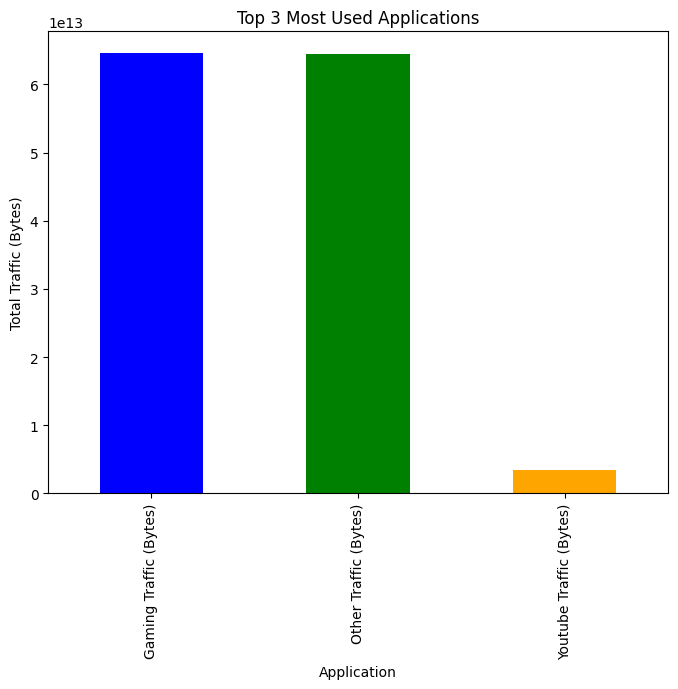

In [27]:
# Sum traffic per application
app_totals = app_traffic.sum().sort_values(ascending=False)

# Top 3 applications
top_3_apps = app_totals.head(3)

# Bar plot
plt.figure(figsize=(8, 6))
top_3_apps.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Top 3 Most Used Applications')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('Application')
plt.show()


In [28]:
import pandas as pd

# Treat missing values (replace with mean for numeric and mode for categorical variables)
for col in ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 
            'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
            'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']:
    data[col].fillna(data[col].mean(), inplace=True)

data['Handset Type'].fillna(data['Handset Type'].mode()[0], inplace=True)

# Aggregate metrics per customer
user_experience = data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': lambda x: x.mode()[0]  # Most common handset type
}).reset_index()

# Rename columns for better clarity
user_experience.rename(columns={
    'TCP DL Retrans. Vol (Bytes)': 'Avg TCP Retransmission DL (Bytes)',
    'TCP UL Retrans. Vol (Bytes)': 'Avg TCP Retransmission UL (Bytes)',
    'Avg RTT DL (ms)': 'Avg RTT DL (ms)',
    'Avg RTT UL (ms)': 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)': 'Avg Throughput DL (kbps)',
    'Avg Bearer TP UL (kbps)': 'Avg Throughput UL (kbps)'
}, inplace=True)

print("Aggregated User Experience Metrics (Sample):\n", user_experience.head())


/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_1256/3354511781.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_1256/3354511781.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Aggregated User Experience Metrics (Sample):
    MSISDN/Number  Avg TCP Retransmission DL (Bytes)  \
0   3.360171e+10                       2.080991e+07   
1   3.360171e+10                       5.751940e+05   
2   3.360171e+10                       1.798137e+07   
3   3.360171e+10                       2.080991e+07   
4   3.360172e+10                       2.080991e+07   

   Avg TCP Retransmission UL (Bytes)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0                      759658.664811       110.000000         5.000000   
1                       44040.000000       145.000000         7.000000   
2                      441902.832406       104.397853        18.831441   
3                      759658.664811        29.000000         5.000000   
4                      759658.664811       109.795706        17.662883   

   Avg Throughput DL (kbps)  Avg Throughput UL (kbps)  \
0                 23.000000                      47.0   
1               7677.000000                    2115.0   
2      

In [29]:
# Function to calculate top, bottom, and most frequent values
def analyze_metric(metric, data):
    top_10 = data[metric].nlargest(10)
    bottom_10 = data[metric].nsmallest(10)
    most_frequent = data[metric].value_counts().head(10)
    return top_10, bottom_10, most_frequent

# Metrics to analyze
metrics = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 
           'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
           'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# Analyze each metric
for metric in metrics:
    print(f"\nAnalysis for {metric}:\n")
    top_10, bottom_10, most_frequent = analyze_metric(metric, data)
    
    print("Top 10 Values:")
    print(top_10)
    print("\nBottom 10 Values:")
    print(bottom_10)
    print("\nMost Frequent Values:")
    print(most_frequent)



Analysis for TCP DL Retrans. Vol (Bytes):

Top 10 Values:
6395      50021024.0
138714    49991791.0
66750     49986834.0
136230    49986038.0
76014     49969605.0
77812     49921268.0
143262    49833677.0
116514    49779123.0
9704      49777538.0
139859    49663906.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Bottom 10 Values:
59708     2.0
125088    2.0
2818      4.0
39582     4.0
52480     4.0
60366     4.0
60417     4.0
75082     4.0
100305    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Most Frequent Values:
TCP DL Retrans. Vol (Bytes)
2.080991e+07    88146
2.080991e+07     2525
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
Name: count, dtype: int64

Analysis for TCP UL Retrans. Vol (Bytes):

Top 10 Values:
77865     1804466.0
141546    1804062.0
78464     1803636.0
45460     1800574.0
1503      1799642.0
137154    179819

/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_1256/348767021.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


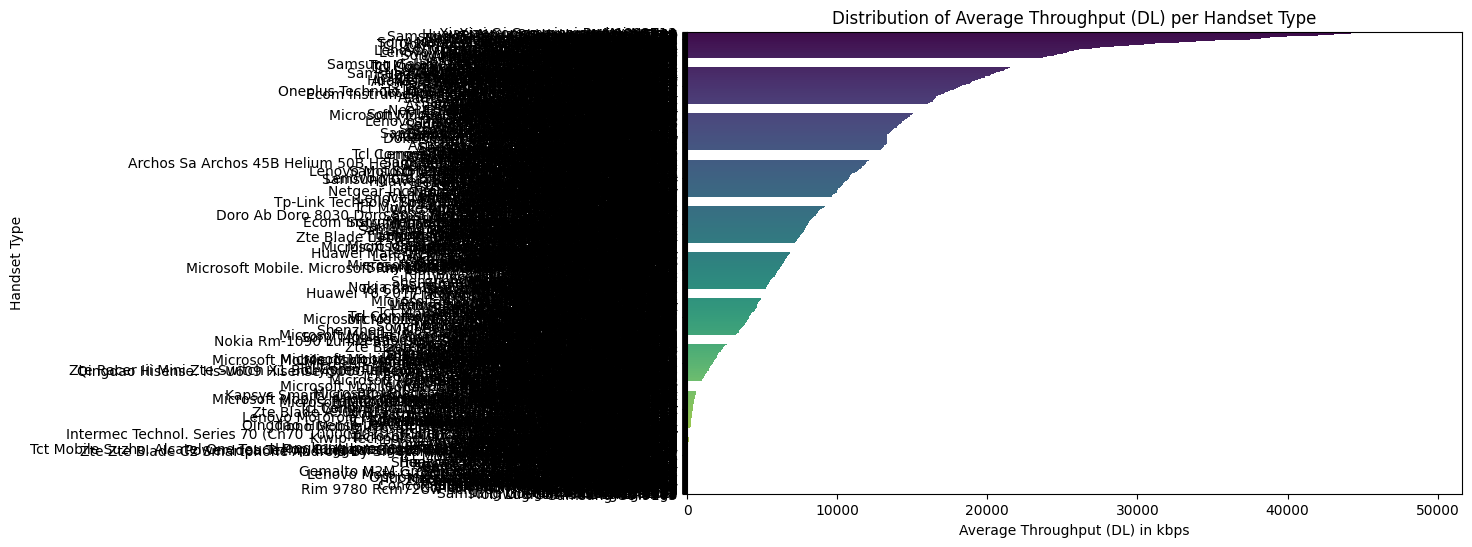

/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_1256/348767021.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


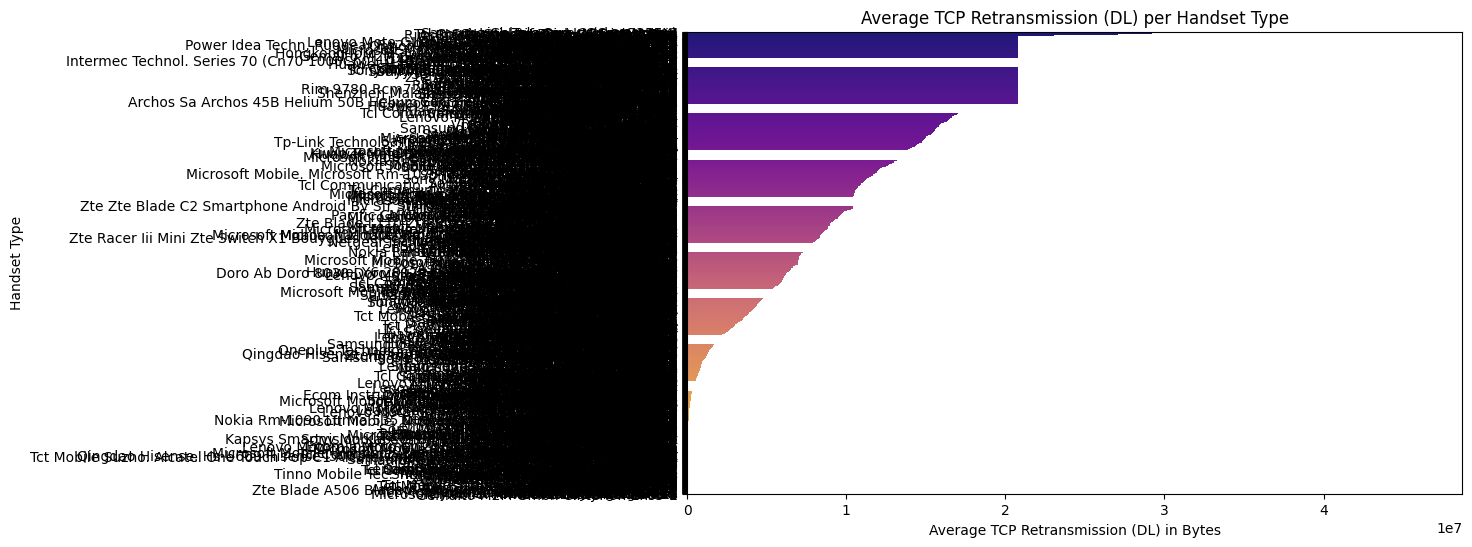

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average throughput and TCP retransmission per handset type
handset_metrics = data.groupby('Handset Type').agg({
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean'
}).reset_index()

# Rename columns for clarity
handset_metrics.rename(columns={
    'Avg Bearer TP DL (kbps)': 'Avg Throughput DL (kbps)',
    'Avg Bearer TP UL (kbps)': 'Avg Throughput UL (kbps)',
    'TCP DL Retrans. Vol (Bytes)': 'Avg TCP Retransmission DL (Bytes)',
    'TCP UL Retrans. Vol (Bytes)': 'Avg TCP Retransmission UL (Bytes)'
}, inplace=True)

# Distribution of average throughput per handset type
plt.figure(figsize=(10, 6))
sns.barplot(
    data=handset_metrics.sort_values('Avg Throughput DL (kbps)', ascending=False),
    x='Avg Throughput DL (kbps)',
    y='Handset Type',
    palette='viridis'
)
plt.title('Distribution of Average Throughput (DL) per Handset Type')
plt.xlabel('Average Throughput (DL) in kbps')
plt.ylabel('Handset Type')
plt.show()

# Average TCP retransmission per handset type
plt.figure(figsize=(10, 6))
sns.barplot(
    data=handset_metrics.sort_values('Avg TCP Retransmission DL (Bytes)', ascending=False),
    x='Avg TCP Retransmission DL (Bytes)',
    y='Handset Type',
    palette='plasma'
)
plt.title('Average TCP Retransmission (DL) per Handset Type')
plt.xlabel('Average TCP Retransmission (DL) in Bytes')
plt.ylabel('Handset Type')
plt.show()


Cluster Summary:
    Experience Cluster  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0                   0        63.260866         8.720111   
1                   1        87.351248        22.912181   
2                   2        63.907514         7.973845   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0               476.964401                91.813861   
1             25408.821058              1630.014872   
2             16717.325692              1162.309155   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  
0                 1.974941e+07                743255.873406  
1                 8.176710e+06                204054.767701  
2                 1.810936e+06                158249.848737  


/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_1256/3744983256.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Experience Cluster', palette='Set2')


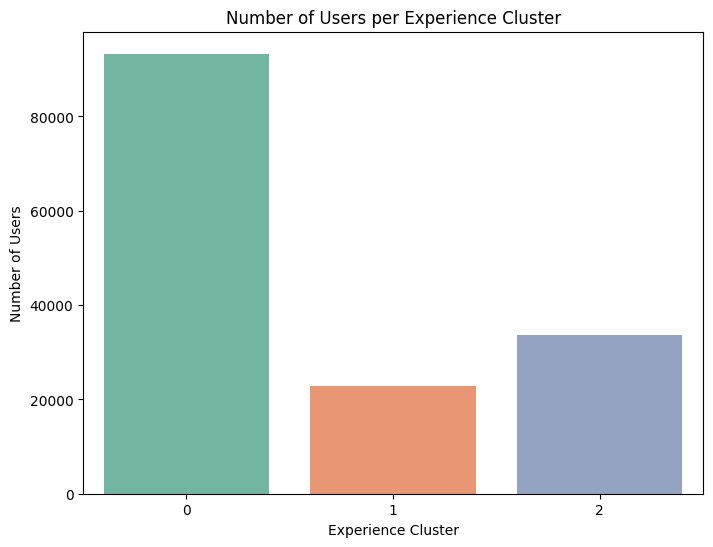

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select relevant metrics
experience_metrics = data[[
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'
]]

# Normalize the metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(experience_metrics)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Experience Cluster'] = kmeans.fit_predict(normalized_metrics)

# Analyze cluster characteristics
cluster_summary = data.groupby('Experience Cluster').agg({
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean'
}).reset_index()

print("Cluster Summary:\n", cluster_summary)

# Plot cluster distributions
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Experience Cluster', palette='Set2')
plt.title('Number of Users per Experience Cluster')
plt.xlabel('Experience Cluster')
plt.ylabel('Number of Users')
plt.show()
